# Visualize some of the gridded data

**Date:** 28-12-2018

**Purpose:** Examine spatial variation is wave heights across the grid in our area of interest~

In [2]:
%matplotlib inline
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import os

In [3]:
my_example_nc_file = r'D:/Masters/data/hindcast/w3aus_4m1990-01-01.nc'

In [4]:
fh = netCDF4.Dataset(my_example_nc_file,'r')
fh.variables.keys()

odict_keys(['CgE', 'time', 'latitude', 'longitude', 'Sxx', 'Sxy', 'Syy', 'U10', 'V10', 'cha', 'dir', 'dp', 'dtd', 'faw', 'fp', 'hs', 't', 't02', 'tm0m1', 'wl', 'wsf'])

In [5]:
lons = fh.variables['longitude'][:]
lats = fh.variables['latitude'][:]
hs = fh.variables['hs'][:]
t02 = fh.variables['t02'][:]
time = fh.variables['time'][:]
pkdir = fh.variables['dp'][:]
pkfreq = fh.variables['fp'][:]
fh.close()

Start putting the information for the map together

In [6]:
# Get some parameters for the Stereographic Projection
lon_0 = lons.mean()
lat_0 = lats.mean()

In [9]:
print('lon', lons.min(), lons.max())
print('lat', lats.min(), lats.max())

lon 152.00026 154.46693
lat -28.266558 -27.33322


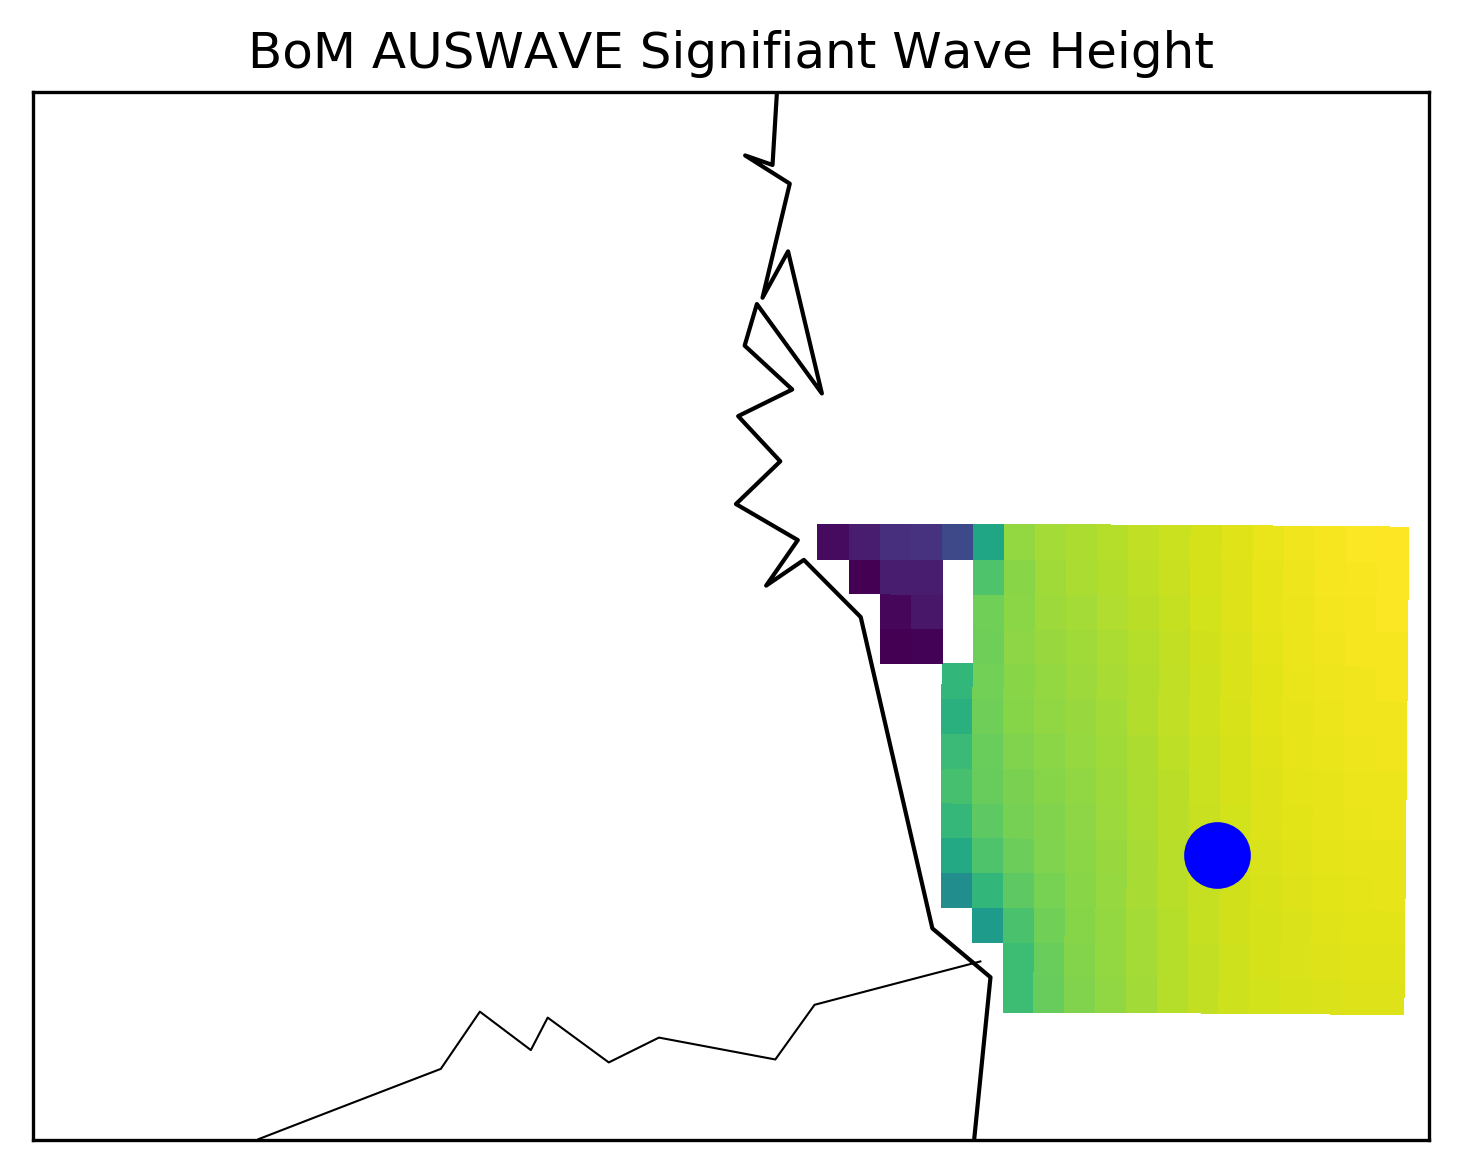

In [11]:
# Plot Size
fig = plt.figure(figsize=(6,6),dpi=300)

m = Basemap(resolution='l',projection='tmerc', lat_0=lat_0,lon_0=lon_0, llcrnrlon=151.5, llcrnrlat=-28.5
           ,urcrnrlon=154.5, urcrnrlat=-26.5)

lon = 154.061
lat = -27.9646
x,y = m(lon, lat)
m.plot(x, y, 'bo', markersize=15)

# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Plot Data
cs = m.pcolormesh(xi,yi,np.squeeze(hs[0]))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
#cbar = m.colorbar(cs, location='bottom', pad="10%")

# Add Title
plt.title('BoM AUSWAVE Signifiant Wave Height')

#plt.savefig('AUSWAVE Model Queensland Clip.png')
plt.show()

**Conclusion:** It looks like there is some spatial variation in wave height through the area of interest within the model, however this is clearly not significant due to the coarse nature of the model

Create animation out of all of the netcdf files in the folder, enables a visualisation over time to se what the changes are within our chosen area of interest

fig size: 72.0 DPI, size in inches [6. 4.]


NameError: name 'sys' is not defined

timestep 0


C:\Users\leope\Anaconda3\envs\mlenv\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


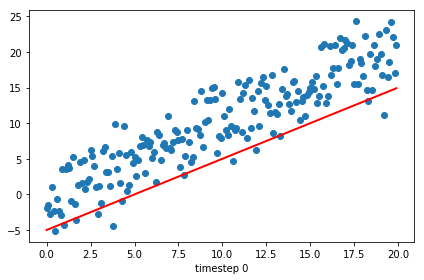

In [17]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

# Plot a scatter that persists (isn't redrawn) and the initial line.
x = np.arange(0, 20, 0.1)
ax.scatter(x, x + np.random.normal(0, 3.0, len(x)))
line, = ax.plot(x, x - 5, 'r-', linewidth=2)

def update(i):
    label = 'timestep {0}'.format(i)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata(x - 5 + i)
    ax.set_xlabel(label)
    return line, ax

if __name__ == '__main__':
    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
    anim = FuncAnimation(fig, update, frames=np.arange(0, 10), interval=200)
    if len(sys.argv) > 1 and sys.argv[1] == 'save':
        anim.save('line.gif', dpi=80, writer='imagemagick')
    else:
        # plt.show() will just loop the animation forever.
        plt.show()